In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Data Generate X,Y
def generateDataset(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m)
    y = 3*X + 1 + 4 * noise
    return X,y
#print(X.mean(), X.std())

In [15]:
X,y = generateDataset(100)
print(X.shape, y.shape)

(100,) (100,)


In [16]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

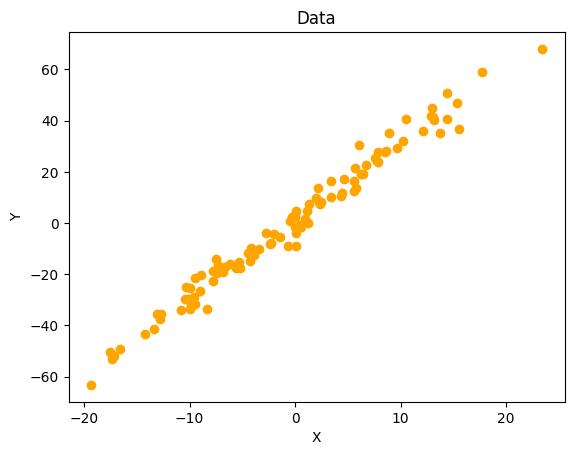

In [17]:
plotData(X,y)

In [18]:
def normaliseData(X):
    X = (X-X.mean()) / X.std()
    return X

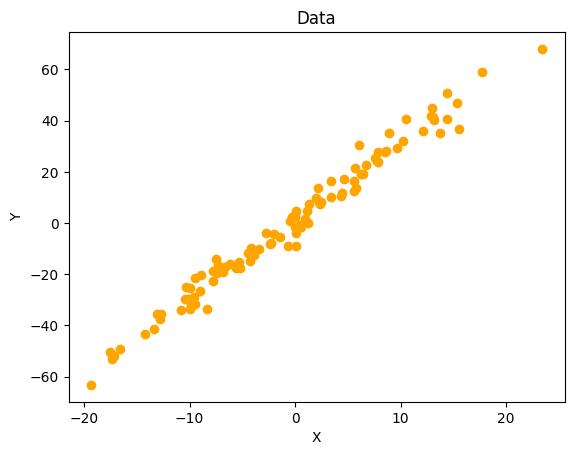

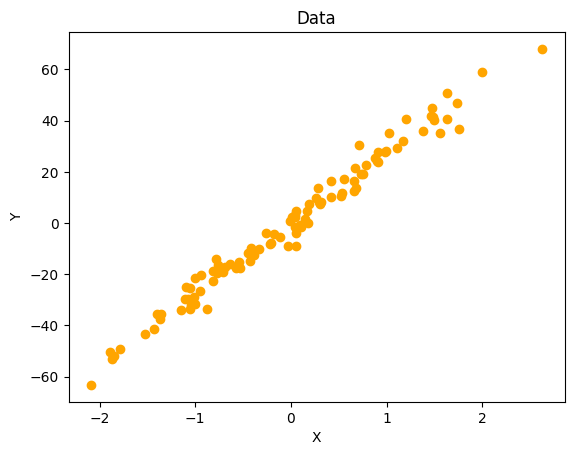

In [19]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [20]:
X.std()

0.9999999999999999

In [21]:
def trainTestSplit(X, y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y
    np.random.shuffle(data)
    split = int(m*split)
    XT = data[:split,0]
    yT = data[:split,1]
    Xt = data[split:, 0]
    yt = data[split:,1]
    return XT, yT, Xt, yt

In [22]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [23]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


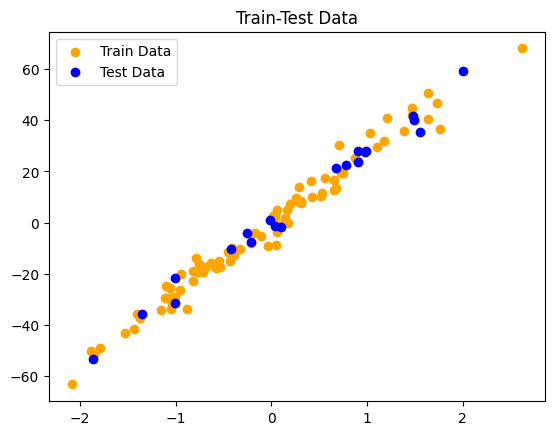

In [24]:
plt.scatter(XT,yT,color='orange',label='Train Data')
plt.scatter(Xt,yt,color='blue', label='Test Data')
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [47]:
# Hypothesis
def hypothesis(X,theta):
    return theta[0] + theta[1] * X

def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e = e + (y[i] - y_i)**2
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp)*X[i]
    return grad/m

def train(X,y,learning_rate = 0.1, maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

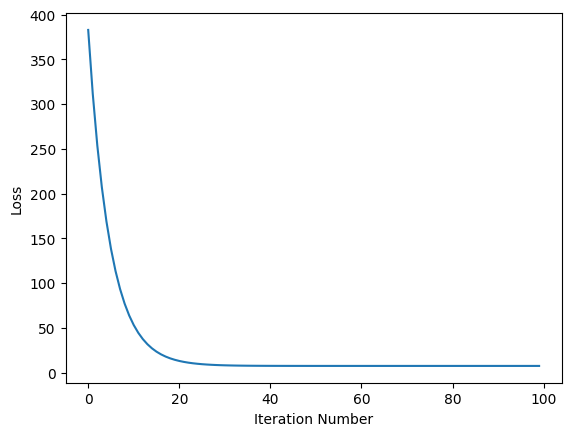

In [49]:
theta = train(X,y,0.1,100)

In [50]:
theta

array([-0.19867172, 27.40609148])

In [54]:
def predict(X,theta):
    return hypothesis(X,theta)

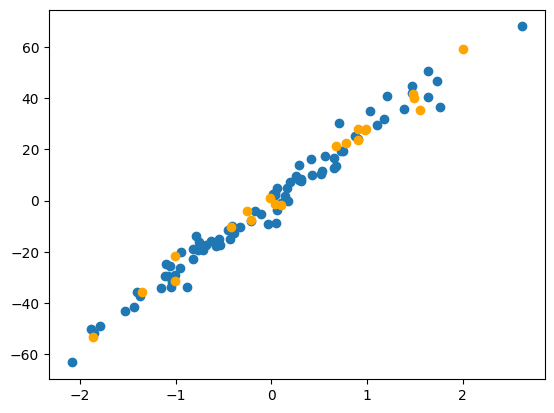

In [53]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

In [55]:
yp = predict(Xt,theta)

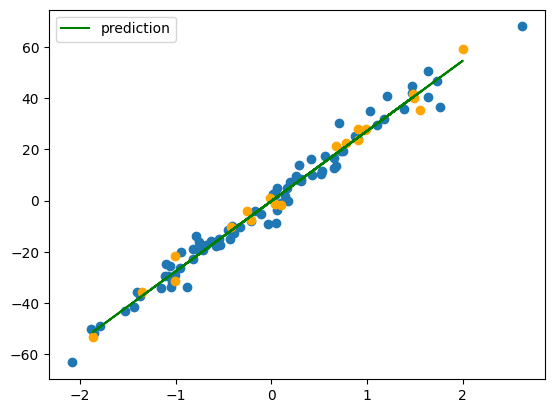

In [60]:
plt.scatter(XT,yT,label='train')
plt.scatter(Xt,yt,color='orange', label='test')
plt.plot(Xt,yp,color='green',label='prediction')
plt.legend()
plt.show()

In [ ]:
y.